## 06 Using specialized packages to grab data
Previously we saw how 3rd party packages vastly increase what Python can do quickly and fairly easily. Here we see that this applies to downloading data as well; someone has written a Python package to download Census data quite easily.

First we need to install the packages, and then we'll use them to grab some data. One note, however, is that to use these packages you need to sign up for a [free] Census API key. You can do this here: https://api.census.gov/data/key_signup.html

Documentation for these packages is here: 
https://pypi.python.org/pypi/census
https://github.com/datamade/census

We'll discuss APIs, such as ths Census API next...

In [1]:
#Import the 'census' package; install if needed
try:
    from census import Census
except:
    import pip
    pip.main(['install','census'])
    from census import Census

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#And we'll preview 'ggplot', import/install it...
try:
    import ggplot as gg
except:
    import pip
    pip.main(['install','ggplot'])
    import ggplot as gg

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\tm254\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\tm254\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [3]:
#And finally, import pandas
import pandas as pd

In [4]:
# Add your census key here:
key = None

In [5]:
# Create the connection to the Census API
c = Census(key, year=2015)

In [6]:
variables = ('NAME', 'B19001_001E')
params = {'for':'tract:*', 'in':'state:24'}
response = c.acs5.get(variables, params)
response = pd.DataFrame(response)
response.dtypes

B19001_001E    float64
NAME            object
county          object
state           object
tract           object
dtype: object

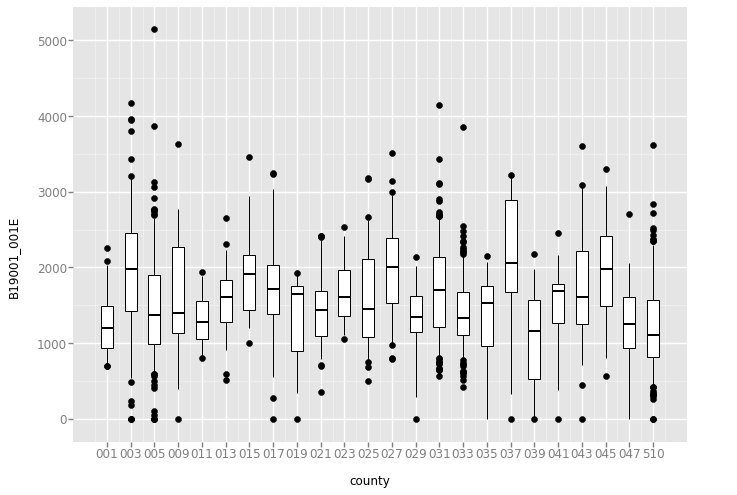

<ggplot: (-9223371889389184666)>

In [7]:
import ggplot as gg

response[variables[1]] = pd.to_numeric(response[variables[1]])
gg.ggplot(response, gg.aes(x = 'county', y = variables[1])) + gg.geom_boxplot()